# Notebook 4 - Interpolate Top Carboniferous Muenster Basin

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, chosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook presents the interpolation of isolines to form a first representation of the Top Carboniferous in the Münster Basin (neglecting faults) and the preparation of interface points for the interpolation with `GemPy`, which will be performed subsequently. The data is available at https://www.opengeodata.nrw.de/produkte/geologie/geologie/SP/grosstekruhr/. 

- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)


<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Mon Oct 12 23:21:34 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

# Load Data

The data that is used in this notebook is obtained from https://www.opengeodata.nrw.de/produkte/geologie/geologie/SP/grosstekruhr/. The data is publically available and contains data sets about the extent of the Cretaceous deposits in the Münsterland Basin, the faults in the the Ruhr Area and isolines for the top of the Carboniferous deposits in the Ruhr Area. 

In [3]:
isolines = gpd.read_file('../../../gemgis/data/misc/top_carboniferous.shp')
isolines['formation'] = isolines['Z']
isolines.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


<a id='ex4'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [4]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [5]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. 

In [6]:
geo_data = gg.GemPyData(model_name='TopCarboniferous', 
                        crs='EPSG:25832', 
                        resolution=[500,500,50],
                        stack = {'TopCarboniferous': ('TopCarboniferous')},
                        extent=[isolines.geometry.total_bounds[0], isolines.geometry.total_bounds[2], isolines.geometry.total_bounds[1], isolines.geometry.total_bounds[3], -2000, 0])                        

In [7]:
vars(geo_data)

{'model_name': 'TopCarboniferous',
 'crs': 'EPSG:25832',
 'extent': [317850.1021999996,
  437555.1816999996,
  5686562.044,
  5749588.531199999,
  -2000,
  0],
 'resolution': [500, 500, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'TopCarboniferous': 'TopCarboniferous'},
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'model_width': 119705.07949999999,
 'model_length': 63026.48719999939,
 'model_depth': 2000,
 'model_area': 7544590660.8816595,
 'model_volume': 15089181321763.318,
 'cell_width': 239.410159,
 'cell_length': 126.05297439999879,
 'cell_depth': 40.0,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Inspecting the attributes GemPy Data Class
These attributes can now be inspected. 

In [8]:
geo_data.model_name

'TopCarboniferous'

In [9]:
geo_data.crs

'EPSG:25832'

In [10]:
geo_data.extent

[317850.1021999996,
 437555.1816999996,
 5686562.044,
 5749588.531199999,
 -2000,
 0]

# Check Total Bounds
The total bounds are checked to limit the extent of the subsequently downloaded WMS Layer.

In [11]:
isolines.geometry.total_bounds

array([ 317850.1022, 5686562.044 ,  437555.1817, 5749588.5312])

# Check dtype of formation column
The type of the formation column is checked to make sure that it is of type float64.

In [12]:
isolines['formation'].dtype

dtype('float64')

# Passing the Isolines to the GemPy Data Class

The isolines are passed to the GemPy Data Class for further processing. 

In [13]:
geo_data.raw_i = isolines
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


# Extract Coordinates
The coordinates are extracted for subsequent plotting of the data.

In [14]:
geo_data.raw_i = gg.vector.extract_xy(geo_data.raw_i)
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation,points,X,Y
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14


# Loading WMS Service for Background Imagery

The WMS Service used in Tutorial 3 will also be used here for Background Imagery. 

## Load WMS Layer and Map
A basic WMS Layer is loaded with a OpenStreetMap as reference to better locate the data.

In [15]:
wms = gg.wms.load('https://ows.terrestris.de/osm/service?')

In [16]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', geo_data.extent[:4], [4000, 2000], 'image/png')

The array is passed to a WMS attribute of the GemPy Data Class. 

In [17]:
geo_data.wms = wms_map
geo_data.wms

array([[[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.92941177, 0.91764706, 0.8862745 , 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ]],

       [[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ]],

       [[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.9137255 , 0.90588236, 0.84705883, 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.925490

## Plotting the WMS Layer
Plotting the WMS Layer with the extent of the isoline Data. Münster is located outside the bounds of the data.

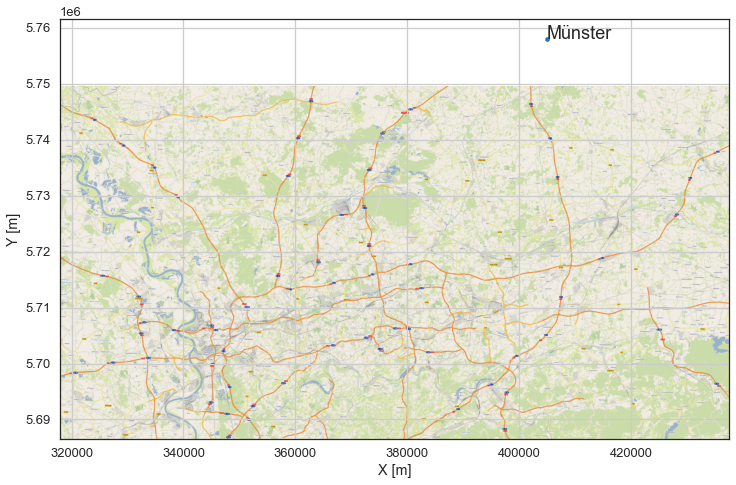

In [18]:
plt.figure(figsize = (12,12))
plt.imshow(geo_data.wms, extent= geo_data.extent[:4])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(405000,5758000, 'Münster', size = 18)
plt.scatter(405000,5758000, s= 18)

# Plot Data
Plotting the data with the GemPy Data class. The different colors on the right side of the plot indicate the different depths of the isolines.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

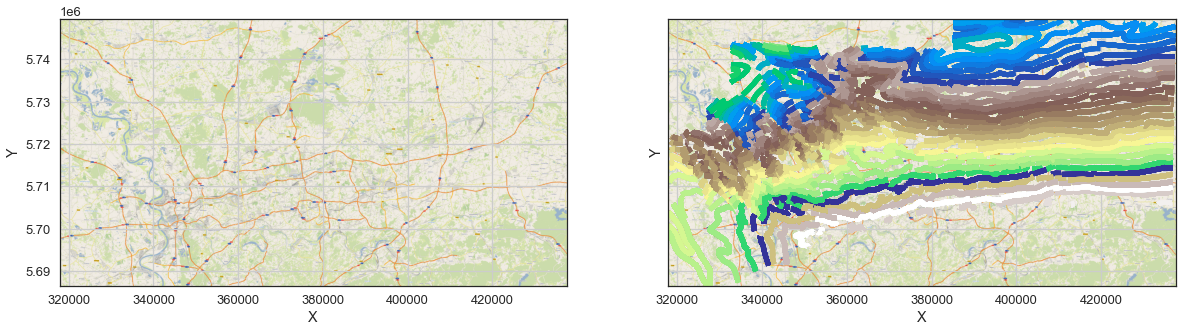

In [19]:
gg.visualization.plot_data(geo_data,
                           show_wms=True, 
                           show_interfaces=True, 
                           show_legend=False,
                           cmap_interfaces='terrain')

# Interpolation Test
Prior to the interpolation of the entire data set, a small data set is being used to demonstrate the interpolation for the raster

In [20]:
isolines.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


## Extraction of Coordinates
The coordinates are extracted and passed to a new variable.

In [21]:
isos = gg.vector.extract_xy(isolines)
isos.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation,points,X,Y
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14


## Clipping the Isolines
The isolines are cropped by a predefined bounding box.

In [22]:
gdf = gg.vector.clip_by_extent(isos, bbox = [390000,400000,5720000,5730000])
gdf.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
889,49,-750.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,5843.36,-750.0,"(390171.4408, 5727567.434900001)",390171.44,5727567.43,POINT (390171.441 5727567.435)
890,49,-750.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,5843.36,-750.0,"(390551.30229999963, 5727484.713400001)",390551.30,5727484.71,POINT (390551.302 5727484.713)
1882,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(392460.66920000035, 5725198.6811999995)",392460.67,5725198.68,POINT (392460.669 5725198.681)
1883,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(392909.27109999955, 5725122.776000001)",392909.27,5725122.78,POINT (392909.271 5725122.776)
1884,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(393529.5569000002, 5724918.5995000005)",393529.56,5724918.60,POINT (393529.557 5724918.600)


## Plotting the data
The clipped isolines are plotted.

201


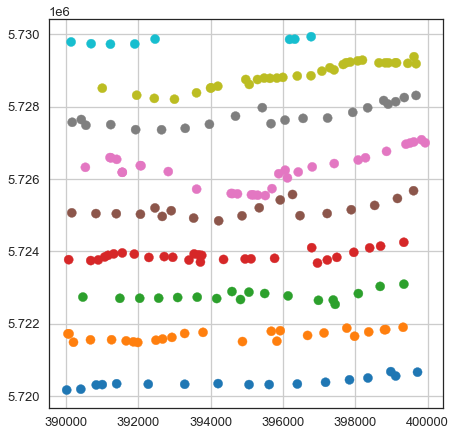

In [23]:
gdf.plot(column = 'formation')
print(len(gdf))
plt.grid()

# Interpolate Raster
The raster is now being interpolated with a resolution of 50 m and the `rbf` method.

In [24]:
raster = gg.vector.interpolate_raster(gdf, method='rbf', res=50)

## Plot data
The input data and the interpolated raster are now plotted.

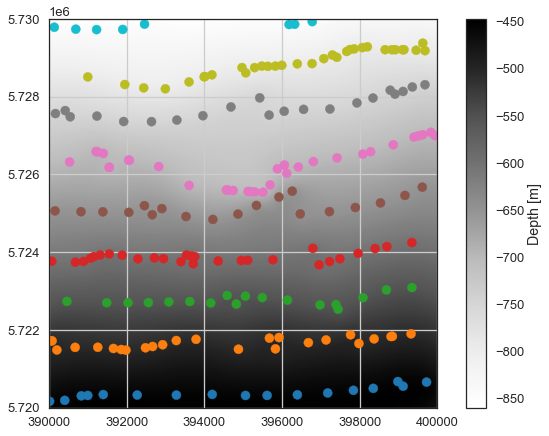

In [25]:
fig, ax1 = plt.subplots()
im =ax1.imshow(raster, extent=[390000,400000,5720000,5730000])
gdf.plot(ax=ax1,column = 'formation')
ax1.grid()
cbar = fig.colorbar(im)
cbar.set_label('Depth [m]')

# Interpolate entire raster

## Clip to Extent of Münsterland Basin
The extent of the data is clipped to the extent of the DEM of the Münsterland Basin as shown in a previous notebook.

In [26]:
geo_data.raw_i = gg.vector.clip_by_extent(geo_data.raw_i, bbox = [360000,500000,5700000,5800000])
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43,POINT (384953.985 5737197.433)
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60,POINT (384762.230 5737179.602)
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42,POINT (384456.483 5737160.423)
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67,POINT (384100.257 5737149.675)
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14,POINT (383700.325 5737117.144)


# Plot data
The data is plotted to visualize the different isolines/vertices. The data set contains more than 9,000 points.

9146

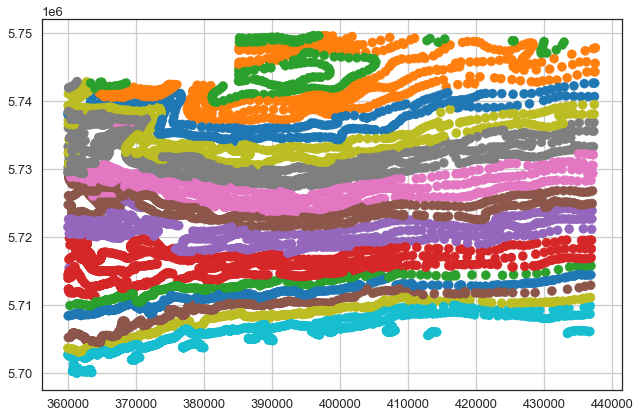

In [27]:
geo_data.raw_i.plot(column = 'formation')
plt.grid()
len(geo_data.raw_i)

# Change Extent
Pass new extent to `geo_data` object.

In [28]:
geo_data.set_extent(360000,500000,5700000,5800000)
geo_data.extent

[360000, 500000, 5700000, 5800000]

# Reload WMS
Reload the WMS Layer with a new extent

In [29]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', [300000, 550000,5650000,5850000], [3000, 2000], 'image/png')

In [30]:
geo_data.wms = wms_map
geo_data.wms

array([[[0.9843137 , 0.9843137 , 0.9764706 , 1.        ],
        [0.9098039 , 0.8980392 , 0.8509804 , 1.        ],
        [0.27058825, 0.27450982, 0.41568628, 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.84313726, 0.8901961 , 0.7137255 , 1.        ]],

       [[0.92156863, 0.9137255 , 0.8901961 , 1.        ],
        [0.34117648, 0.34117648, 0.47058824, 1.        ],
        [0.60784316, 0.6431373 , 0.7176471 , 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.84313726, 0.8901961 , 0.7137255 , 1.        ]],

       [[0.8509804 , 0.85882354, 0.8901961 , 1.        ],
        [0.45490196, 0.4509804 , 0.54509807, 1.        ],
        [0.29803923, 0.3019608 , 0.44313726, 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.862745

# Plot Data
Plot the data to the extent of the Münsterland Basin. 

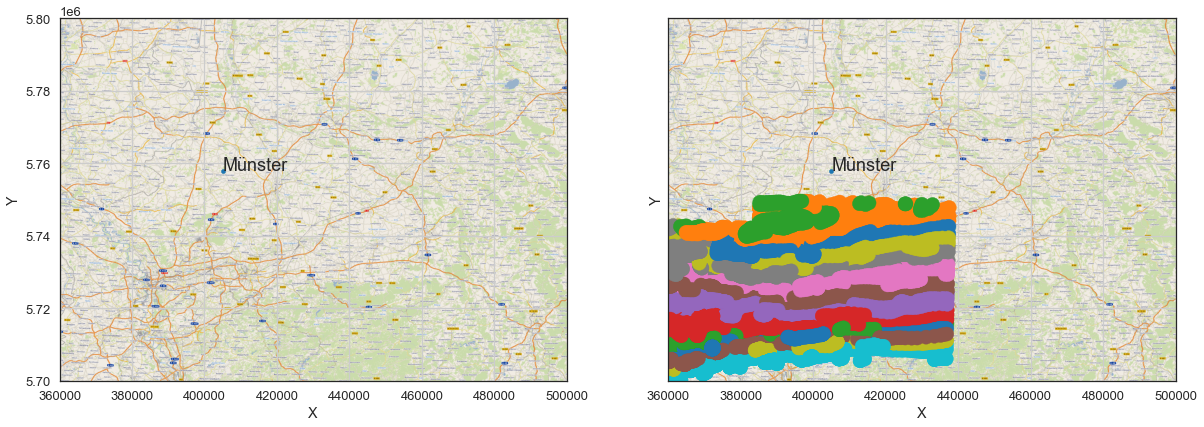

In [31]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data,
                           show_wms=True, 
                           show_interfaces=True, 
                           show_legend=False,
                           cmap_interfaces='terrain')

ax1.text(405000,5758000, 'Münster', size = 18)
ax2.text(405000,5758000, 'Münster', size = 18)
ax1.scatter(405000,5758000, s= 18)
ax2.scatter(405000,5758000, s= 18)

# Interpolate Isolines
Plotting the isolines

9146

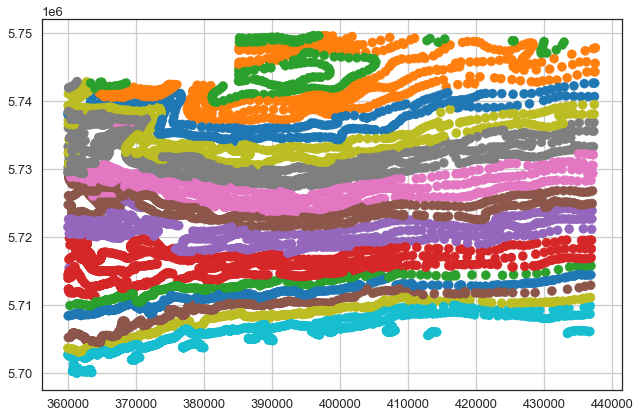

In [32]:
geo_data.raw_i.plot(column = 'formation')
plt.grid()
len(geo_data.raw_i)

# Interpolate Raster
Now, the entire raster is interpolated on a coarse grid. In addition, the data has to be sampled to avoid singular matrices due to the large number of data points. 

In [33]:
raster = gg.vector.interpolate_raster(geo_data.raw_i, method='rbf', res=500, n=1000)

(99, 154)

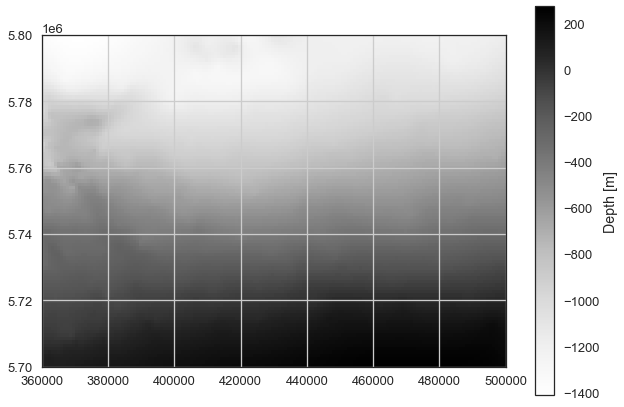

In [34]:
im = plt.imshow(raster, extent=[360000,500000,5700000,5800000])
cbar = plt.colorbar(im)
plt.grid()
cbar.set_label('Depth [m]')
raster.shape

# Recommendations

It is recommended to use vertices of the isolines directly for the interpolation in `GemPy` rather than sampling from this coarse interpolated raster. Orientations will be sampled for simplicity but should be calculated based on the original isolines. 

# Data Preparation
The data is now being prepared for the modeling in `GemPy`.

## Changing the formation

In [35]:
geo_data.raw_i['formation'] = 'TopCarboniferous'
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384953.98479999974, 5737197.433)",384953.98,5737197.43,POINT (384953.985 5737197.433)
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60,POINT (384762.230 5737179.602)
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42,POINT (384456.483 5737160.423)
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67,POINT (384100.257 5737149.675)
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14,POINT (383700.325 5737117.144)


## Setting the Interfaces for the model

In [36]:
geo_data.interfaces = geo_data.raw_i
geo_data.interfaces.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384953.98479999974, 5737197.433)",384953.98,5737197.43,POINT (384953.985 5737197.433)
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60,POINT (384762.230 5737179.602)
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42,POINT (384456.483 5737160.423)
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67,POINT (384100.257 5737149.675)
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14,POINT (383700.325 5737117.144)


# Obtaining orientations

In [37]:
orientations = gg.raster.sample_orientations(np.flipud(raster), extent=[360000,500000,5700000,5800000])
geo_data.orientations = orientations
geo_data.orientations['formation'] = 'TopCarboniferous'
geo_data.orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,498440.55,5774816.57,-29.64,1.09,19.03,1.00,TopCarboniferous
1,399262.16,5778927.93,-67.51,2.47,354.17,1.00,TopCarboniferous
2,374451.64,5744789.35,-540.70,0.78,9.54,1.00,TopCarboniferous
3,487203.37,5729361.41,-820.08,1.09,348.85,1.00,TopCarboniferous
4,400288.55,5713002.86,-1262.52,1.25,341.37,1.00,TopCarboniferous
5,362711.37,5767883.55,-264.36,1.15,347.66,1.00,TopCarboniferous
6,389627.94,5726554.67,-1012.63,0.74,351.54,1.00,TopCarboniferous
7,428820.24,5705336.25,-1239.94,0.42,5.71,1.00,TopCarboniferous
8,440376.46,5714672.86,-1151.03,1.13,333.46,1.00,TopCarboniferous
9,442502.78,5769975.84,-162.45,2.41,250.23,1.00,TopCarboniferous


## Setting the extent

In [38]:
geo_data.set_extent(360000,500000,5700000,5800000, -2000, 0)
geo_data.extent

[360000, 500000, 5700000, 5800000, -2000, 0]

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [39]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\gemgis\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [40]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

TopCarboniferous  2020-10-12 23:22

In [41]:
geo_model.solutions


Lithology ids 
  [] 

In [42]:
geo_data.interfaces.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384953.98479999974, 5737197.433)",384953.98,5737197.43,POINT (384953.985 5737197.433)
1,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60,POINT (384762.230 5737179.602)
2,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42,POINT (384456.483 5737160.423)
3,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67,POINT (384100.257 5737149.675)
4,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,TopCarboniferous,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14,POINT (383700.325 5737117.144)


In [43]:
geo_data.orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,498440.55,5774816.57,-29.64,1.09,19.03,1.00,TopCarboniferous
1,399262.16,5778927.93,-67.51,2.47,354.17,1.00,TopCarboniferous
2,374451.64,5744789.35,-540.70,0.78,9.54,1.00,TopCarboniferous
3,487203.37,5729361.41,-820.08,1.09,348.85,1.00,TopCarboniferous
4,400288.55,5713002.86,-1262.52,1.25,341.37,1.00,TopCarboniferous
5,362711.37,5767883.55,-264.36,1.15,347.66,1.00,TopCarboniferous
6,389627.94,5726554.67,-1012.63,0.74,351.54,1.00,TopCarboniferous
7,428820.24,5705336.25,-1239.94,0.42,5.71,1.00,TopCarboniferous
8,440376.46,5714672.86,-1151.03,1.13,333.46,1.00,TopCarboniferous
9,442502.78,5769975.84,-162.45,2.41,250.23,1.00,TopCarboniferous


In [44]:
geo_data.extent

[360000, 500000, 5700000, 5800000, -2000, 0]

In [45]:
geo_data.resolution

[500, 500, 50]

In [46]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


TopCarboniferous  2020-10-12 23:22

In [47]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,TopCarboniferous,Default series,1,#015482,1


In [48]:
geo_data.stack

{'TopCarboniferous': 'TopCarboniferous'}

In [49]:
gp.map_stack_to_surfaces(geo_model,
                         {'Strata': ('TopCarboniferous')},
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,TopCarboniferous,Strata,1,#015482,1
1,basement,Strata,2,#9f0052,2


In [50]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                       values
range              172058.13
$C_o$           704857142.86
drift equations          [3]


In [51]:
sol = gp.compute_model(geo_model, compute_mesh=True)

MemoryError: Unable to allocate 638. MiB for an array with shape (9145, 9145) and data type float64

In [ ]:
geo_model.surfaces.df

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

In [ ]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252','#b35a2a' ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

In [ ]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

In [ ]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

In [ ]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25)

In [ ]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [ ]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

## Plot Polygons

In [ ]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [ ]:
gdf.to_file('../../../gemgis/data/examples/example1/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [ ]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example1/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

In [ ]:
sol = gg.post.extract_borehole(geo_model, geo_data, [500,500])

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Sand1

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Sand1', clim=[300, 750], notebook=True)

## Depth Map Ton

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Ton', clim=[300, 750], notebook=True)